In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import statistics as st
from datetime import datetime
from matplotlib.pylab import rcParams
import warnings;
warnings.simplefilter("ignore")
import os
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
%matplotlib inline

pd.plotting.register_matplotlib_converters()
sns.set()

In [2]:
data = pd.read_excel("Exc.xlsx", index_col =0)
data = data.astype("float")
data = data.asfreq("Q")


In [3]:
train = data[:44]
test = data[44:]

In [4]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

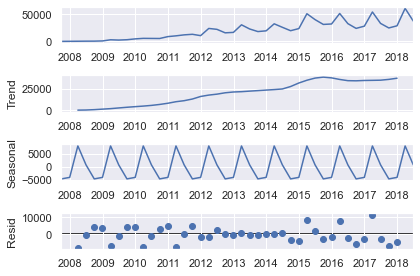

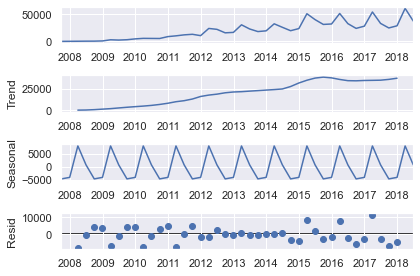

In [5]:
seasonal_decompose(train, model="addictive", freq = 4).plot()

In [6]:
from statsmodels.tsa.statespace.exponential_smoothing import ExponentialSmoothing

## Simple ES

C:\Python38\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


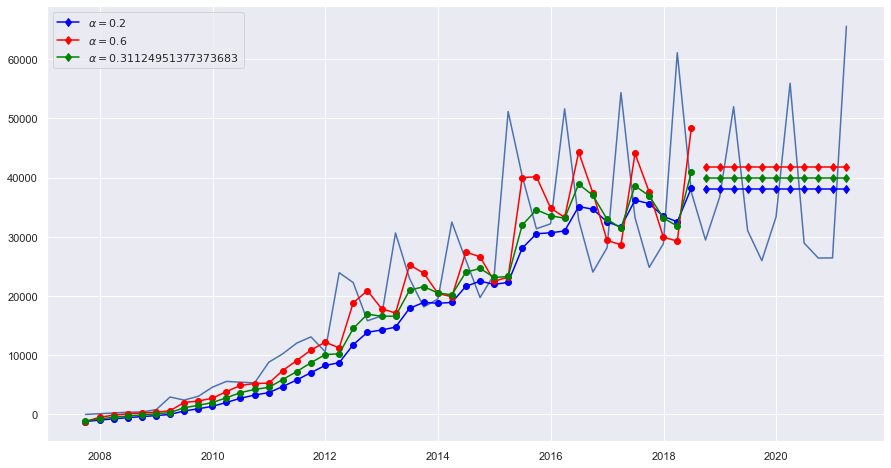

In [7]:
fit1 = SimpleExpSmoothing(train, initialization_method="heuristic").fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(11).rename(r'$\alpha=0.2$')
fit2 = SimpleExpSmoothing(train, initialization_method="heuristic").fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(11).rename(r'$\alpha=0.6$')
fit3 = SimpleExpSmoothing(train, initialization_method="estimated").fit()
fcast3 = fit3.forecast(11).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])#automatics fill

plt.figure(figsize=(15, 8))
plt.plot(data)


plt.plot(fit1.fittedvalues, marker='o', color='blue')
line1, = plt.plot(fcast1, marker='d', color='blue')
plt.plot(fit2.fittedvalues, marker='o', color='red')
line2, = plt.plot(fcast2, marker='d', color='red')
plt.plot(fit3.fittedvalues, marker='o', color='green')
line3, = plt.plot(fcast3, marker='d', color='green')
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error as mae, mean_squared_error

In [9]:
print(fcast1.name,"MSE:", mean_squared_error(data.values[44:], fcast1),
     "MAPE:", mean_absolute_percentage_error(data.values[44:], fcast1),
      "MAE:", mae(data.values[44:], fcast1),
      "RMSE:", np.sqrt(mean_squared_error(data.values[44:], fcast1)))
print(fcast2.name, "MSE:", mean_squared_error(data.values[44:], fcast2),
     "MAPE:", mean_absolute_percentage_error(data.values[44:], fcast2),
      "MAE:", mae(data.values[44:], fcast2),
      "RMSE:", np.sqrt(mean_squared_error(data.values[44:], fcast2)))
print(fcast3.name,"MSE:", mean_squared_error(data.values[44:], fcast3),
     "MAPE:", mean_absolute_percentage_error(data.values[44:], fcast3),
      "MAE:", mae(data.values[44:], fcast3),
      "RMSE:", np.sqrt(mean_squared_error(data.values[44:], fcast3)))

$\alpha=0.2$ MSE: 174443526.8996911 MAPE: 0.3065107814055487 MAE: 11423.565188347076 RMSE: 13207.707102282784
$\alpha=0.6$ MSE: 193655692.73234865 MAPE: 0.3818211877291484 MAE: 13137.9285014396 RMSE: 13916.022877688461
$\alpha=0.31124951377373683$ MSE: 179934258.9964621 MAPE: 0.3419249317707223 MAE: 12229.731601651509 RMSE: 13413.957618706796


## Holts method

C:\Python38\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


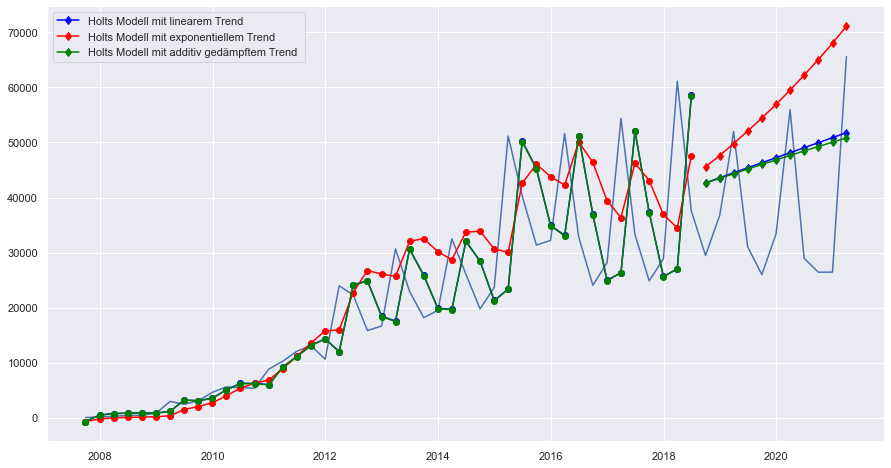

In [11]:
fit1 = Holt(train, initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2, optimized=False)
fcast1 = fit1.forecast(11).rename("Holts Modell mit linearem Trend")

fit2 = Holt(train, exponential=True, initialization_method="estimated").fit(smoothing_level=0.4, smoothing_trend=0.1, optimized=False)
fcast2 = fit2.forecast(11).rename("Holts Modell mit exponentiellem Trend")

fit3 = Holt(train, damped_trend=True, initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2)
fcast3 = fit3.forecast(11).rename("Holts Modell mit additiv gedämpftem Trend")

plt.figure(figsize=(15, 8))
plt.plot(data)
plt.plot(fit1.fittedvalues, color='blue', marker='o' )
line1, = plt.plot(fcast1, marker='d', color='blue')
plt.plot(fit2.fittedvalues, color='red', marker='o')
line2, = plt.plot(fcast2, marker='d', color='red')
plt.plot(fit3.fittedvalues, color='green', marker='o')
line3, = plt.plot(fcast3, marker='d', color='green')
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])

In [11]:
print(fcast1.name, "MSE:", mean_squared_error(data.values[44:], fcast1),
     "MAPE:", mean_absolute_percentage_error(data.values[44:], fcast1),
      "MAE:", mae(data.values[44:], fcast1),
      "RMSE:", np.sqrt(mean_squared_error(data.values[44:], fcast1)))
print(fcast2.name, "MSE:", mean_squared_error(data.values[44:], fcast2),
     "MAPE:", mean_absolute_percentage_error(data.values[44:], fcast2),
      "MAE:", mae(data.values[44:], fcast2),
      "RMSE:", np.sqrt(mean_squared_error(data.values[44:], fcast2)))
print(fcast3.name,   "MSE:", mean_squared_error(data.values[44:], fcast3),
     "MAPE:", mean_absolute_percentage_error(data.values[44:], fcast3),
      "MAE:", mae(data.values[44:], fcast3),
      "RMSE:", np.sqrt(mean_squared_error(data.values[44:], fcast3)))

Holt's linear trend MSE: 263271536.39524615 MAPE: 0.4816104284878637 MAE: 15070.379745676695 RMSE: 16225.644406162923
Exponential trend MSE: 596729128.9461052 MAPE: 0.6995975169641688 MAE: 20438.46695971637 RMSE: 24428.039809737194
Additive damped trend MSE: 254977347.32492507 MAPE: 0.47360691707224684 MAE: 14923.358510737755 RMSE: 15968.010124149003


Seasonally adjusted data

C:\Python38\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Python38\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Python38\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


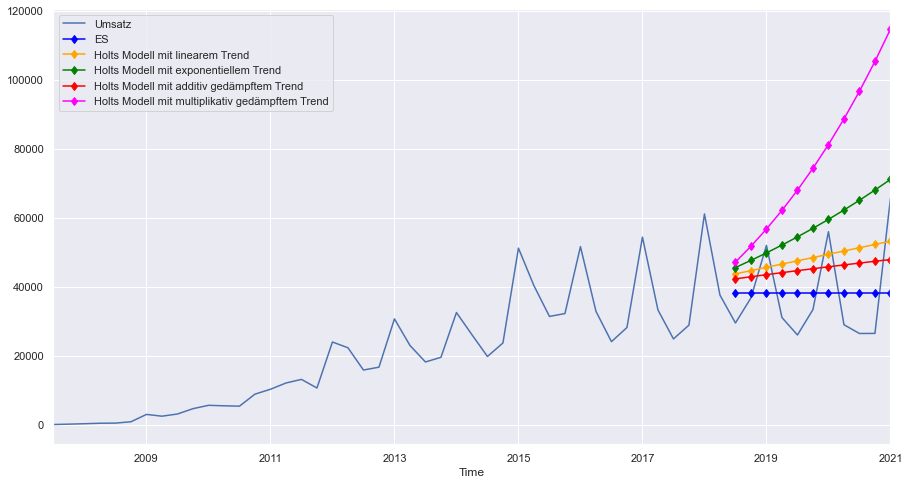

In [14]:
fit1 = SimpleExpSmoothing(train, initialization_method="estimated").fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(11).rename("ES")
fit2 = Holt(train, initialization_method="estimated").fit()
fcast2 = fit2.forecast(11).rename("Holts Modell mit linearem Trend")
fit3 = Holt(train, exponential=True, initialization_method="estimated").fit(smoothing_level=0.4,
                                                                            smoothing_trend=0.1,
                                                                            optimized=False)
fcast3 = fit3.forecast(11).rename("Holts Modell mit exponentiellem Trend")
fit4 = Holt(train, damped_trend=True, initialization_method="estimated").fit(damping_trend=0.98)
fcast4 = fit4.forecast(11).rename("Holts Modell mit additiv gedämpftem Trend")
fit5 = Holt(train, exponential=True, damped_trend=True, initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2)
fcast5 = fit5.forecast(11).rename("Holts Modell mit multiplikativ gedämpftem Trend")


ax = data.plot(figsize=(15,8))

fcast1.plot(ax=ax, color='blue', marker="d", legend=True)
fcast2.plot(ax=ax, color='orange', legend=True, marker="d")
fcast3.plot(ax=ax, color='green', legend=True, marker="d")
fcast4.plot(ax=ax, color='red', legend=True, marker="d")
fcast5.plot(ax=ax, color='magenta', legend=True, marker="d")

plt.show()

In [13]:
print(fcast1.name, "MSE:", mean_squared_error(data.values[44:], fcast1),
     "MAPE:", mean_absolute_percentage_error(data.values[44:], fcast1),
      "MAE:", mae(data.values[44:], fcast1),
      "RMSE:", np.sqrt(mean_squared_error(data.values[44:], fcast1)))
print(fcast2.name, "MSE:", mean_squared_error(data.values[44:], fcast2),
     "MAPE:", mean_absolute_percentage_error(data.values[44:], fcast2),
      "MAE:", mae(data.values[44:], fcast2),
      "RMSE:", np.sqrt(mean_squared_error(data.values[44:], fcast2)))
print(fcast3.name,   "MSE:", mean_squared_error(data.values[44:], fcast3),
     "MAPE:", mean_absolute_percentage_error(data.values[44:], fcast3),
      "MAE:", mae(data.values[44:], fcast3),
      "RMSE:", np.sqrt(mean_squared_error(data.values[44:], fcast3)))
print(fcast4.name,   "MSE:", mean_squared_error(data.values[44:], fcast4),
     "MAPE:", mean_absolute_percentage_error(data.values[44:], fcast4),
      "MAE:", mae(data.values[44:], fcast4),
      "RMSE:", np.sqrt(mean_squared_error(data.values[44:], fcast4)))
print(fcast5.name,   "MSE:", mean_squared_error(data.values[44:], fcast5),
     "MAPE:", mean_absolute_percentage_error(data.values[44:], fcast5),
      "MAE:", mae(data.values[44:], fcast5),
      "RMSE:", np.sqrt(mean_squared_error(data.values[44:], fcast5)))


SES MSE: 174443526.8996911 MAPE: 0.3065107814055487 MAE: 11423.565188347076 RMSE: 13207.707102282784
Holt's MSE: 288818360.72533697 MAPE: 0.5057858634871338 MAE: 15606.998896554525 RMSE: 16994.65682870169
Exponential MSE: 596729128.9461052 MAPE: 0.6995975169641688 MAE: 20438.46695971637 RMSE: 24428.039809737194
Additive Damped MSE: 227820792.85458934 MAPE: 0.44303397187575677 MAE: 14325.128900716407 RMSE: 15093.733562461917
Multiplicative Damped MSE: 2068516199.833255 MAPE: 1.2591792003620486 MAE: 39523.0400381535 RMSE: 45480.943260152984


## Holt Winters

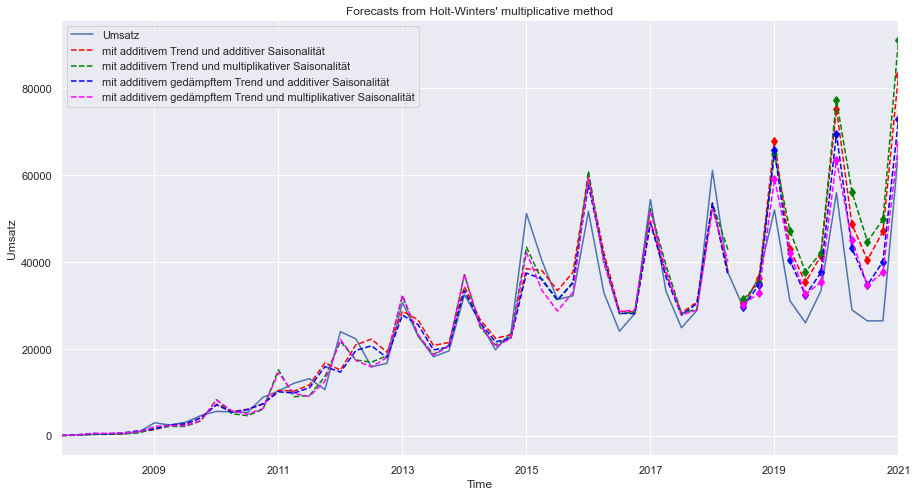

Figure 7.6: Forecasting international visitor nights in Australia using Holt-Winters method with both additive and multiplicative seasonality.


,Additive,Multiplicative,Additive Dam,Multiplica Dam
$\alpha$,5.304146e-01,6.938851e-01,4.936105e-01,4.695153e-01
$\beta$,8.156312e-02,2.330675e-08,5.209774e-07,4.574454e-12
$\phi$,NaN,NaN,9.649316e-01,9.660146e-01
$\gamma$,4.695854e-01,4.100739e-09,5.063891e-01,8.160645e-12
$l_0$,3.057363e+00,1.225210e-02,-1.250875e+00,7.281517e-14
$b_0$,7.618341e+00,2.776374e+00,1.220216e+01,1.117427e+01
SSE,7.061503e+08,5.185554e+08,6.354423e+08,5.072971e+08


In [15]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
fit1 = ExponentialSmoothing(train, seasonal_periods=4, trend='add', seasonal='add', use_boxcox=True, initialization_method="estimated").fit()
fit2 = ExponentialSmoothing(train, seasonal_periods=4, trend='add', seasonal='mul', use_boxcox=True, initialization_method="estimated").fit()
fit3 = ExponentialSmoothing(train, seasonal_periods=4, trend='add', seasonal='add', damped_trend=True, use_boxcox=True, initialization_method="estimated").fit()
fit4 = ExponentialSmoothing(train, seasonal_periods=4, trend='add', seasonal='mul', damped_trend=True, use_boxcox=True, initialization_method="estimated").fit()
results=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$\gamma$",r"$l_0$","$b_0$","SSE"])
params = ['smoothing_level', 'smoothing_trend', 'damping_trend', 'smoothing_seasonal', 'initial_level', 'initial_trend']
results["Additive"]       = [fit1.params[p] for p in params] + [fit1.sse]
results["Multiplicative"] = [fit2.params[p] for p in params] + [fit2.sse]
results["Additive Dam"]   = [fit3.params[p] for p in params] + [fit3.sse]
results["Multiplica Dam"] = [fit4.params[p] for p in params] + [fit4.sse]

ax = data.plot(figsize=(15,8), title="Forecasts from Holt-Winters' multiplicative method" )
ax.set_ylabel("Umsatz")
ax.set_xlabel("Year")
fit1.fittedvalues.plot(ax=ax, style='--', color='red')
fit2.fittedvalues.plot(ax=ax, style='--', color='green')
fit3.fittedvalues.plot(ax=ax, style='--', color='blue')
fit4.fittedvalues.plot(ax=ax, style='--', color='magenta')



fcast1 = fit1.forecast(11).rename('mit additivem Trend und additiver Saisonalität')
fcast1.plot(ax=ax, style='--', marker='d', color='red', legend=True) 
fcast2 = fit2.forecast(11).rename('mit additivem Trend und multiplikativer Saisonalität')
fcast2.plot(ax=ax, style='--', marker='d', color='green', legend=True)
fcast3 = fit3.forecast(11).rename('mit additivem gedämpftem Trend und additiver Saisonalität')
fcast3.plot(ax=ax, style='--', marker='d', color='blue', legend=True)
fcast4 = fit4.forecast(11).rename('mit additivem gedämpftem Trend und multiplikativer Saisonalität')
fcast4.plot(ax=ax, style='--', marker='d', color='magenta', legend=True)
plt.show()
print("Figure 7.6: Forecasting international visitor nights in Australia using Holt-Winters method with both additive and multiplicative seasonality.")

results

In [15]:
print(fcast1.name, "MSE:", mean_squared_error(data.values[44:], fcast1),
     "MAPE:", mean_absolute_percentage_error(data.values[44:], fcast1),
      "MAE:", mae(data.values[44:], fcast1),
      "RMSE:", np.sqrt(mean_squared_error(data.values[44:], fcast1)))
print(fcast2.name, "MSE:", mean_squared_error(data.values[44:], fcast2),
     "MAPE:", mean_absolute_percentage_error(data.values[44:], fcast2),
      "MAE:", mae(data.values[44:], fcast2),
      "RMSE:", np.sqrt(mean_squared_error(data.values[44:], fcast2)))
print(fcast3.name,   "MSE:", mean_squared_error(data.values[44:], fcast3),
     "MAPE:", mean_absolute_percentage_error(data.values[44:], fcast3),
      "MAE:", mae(data.values[44:], fcast3),
      "RMSE:", np.sqrt(mean_squared_error(data.values[44:], fcast3)))
print(fcast4.name,   "MSE:", mean_squared_error(data.values[44:], fcast4),
     "MAPE:", mean_absolute_percentage_error(data.values[44:], fcast4),
      "MAE:", mae(data.values[44:], fcast4),
      "RMSE:", np.sqrt(mean_squared_error(data.values[44:], fcast4)))


Holt-Winters (add-add-seasonal) MSE: 203686408.5755595 MAPE: 0.35868855843817943 MAE: 12546.782538059279 RMSE: 14271.874739345196
Holt-Winters (add-mul-seasonal) MSE: 306864607.9569701 MAPE: 0.4433152777706532 MAE: 15343.138958399988 RMSE: 17517.5514258406
Holt-Winters (add-damped-add-seasonal) MSE: 93788847.59186894 MAPE: 0.24264339621248202 MAE: 8434.649674295473 RMSE: 9684.464238762459
Holt-Winters (add-damped-mul-seasonal) MSE: 67512107.28227341 MAPE: 0.2162565717085361 MAE: 6898.865133386079 RMSE: 8216.575155274453
